<a href="https://colab.research.google.com/github/nancymary-web/Project1/blob/master/copy_of_ssd_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import cv2
import os
from google.colab.patches import cv2_imshow # we use to display the image

In [3]:
classNames = { 0: 'background',
    1: 'aeroplane', 2: 'bicycle', 3: 'bird', 4: 'boat',
    5: 'bottle', 6: 'bus', 7: 'car', 8: 'cat', 9: 'chair',
    10: 'cow', 11: 'diningtable', 12: 'dog', 13: 'horse',
    14: 'motorbike', 15: 'person', 16: 'pottedplant',
    17: 'sheep', 18: 'sofa', 19: 'train', 20: 'tvmonitor' }

In [4]:
proto = "/MobileNetSSD_deploy.prototxt"
weights = "/MobileNetSSD_deploy.caffemodel"
model = cv2.dnn.readNetFromCaffe(proto , weights)

In [6]:
type(img)

NoneType

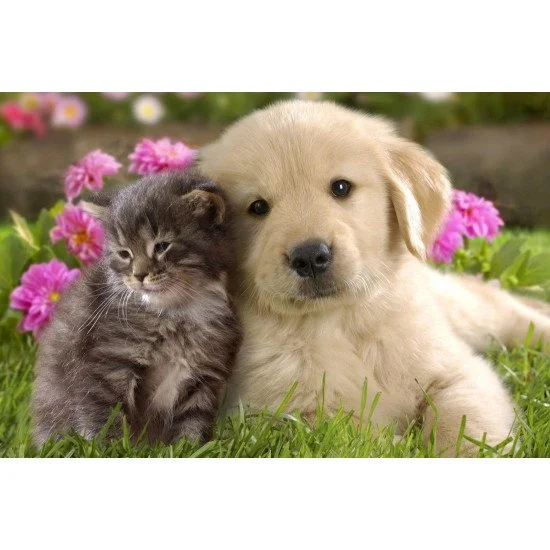

In [7]:
img = cv2.imread("/dog kitteb .jpeg") ## BGR
cv2_imshow(img)

In [8]:
img.shape

(550, 550, 3)

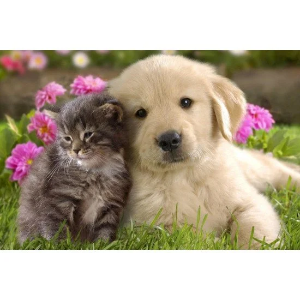

In [12]:
cv2_imshow(img_resized)

In [13]:
blob = cv2.dnn.blobFromImage(img_resized , 0.007843 , (300 , 300) ,
                             (127.5 , 127.5 , 127.5) , False)
# net.setInput(blob)
# detections = net.forward()

blob.shape

(1, 3, 300, 300)

In [16]:
print(type(blob))
print(blob.shape)

<class 'numpy.ndarray'>
(1, 3, 300, 300)


In [17]:
model.setInput(blob)
detections = model.forward()

In [19]:
print(type(detections))
print(detections.shape)

<class 'numpy.ndarray'>
(1, 1, 100, 7)


In [24]:
detections

array([[[[ 0.        , 12.        ,  0.997528  ,  0.302085  ,
           0.18939456,  0.9885775 ,  0.82733953],
         [ 0.        ,  8.        ,  0.9930587 ,  0.03745827,
           0.3072331 ,  0.42994347,  0.8159157 ],
         [ 0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.   

In [25]:
final= np.squeeze(detections)
print(final.shape)

(100, 7)


In [30]:
import pandas as pd
#pd.reset_option('display.max_rows',None)
pd.DataFrame(final)

,0,1,2,3,4,5,6
0,0.0,12.0,0.997528,0.302085,0.189395,0.988577,0.827340
1,0.0,8.0,0.993059,0.037458,0.307233,0.429943,0.815916
2,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
95,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
96,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
97,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
98,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [29]:
img.shape

(550, 550, 3)

In [31]:
font =cv2.FONT_HERSHEY_SIMPLEX


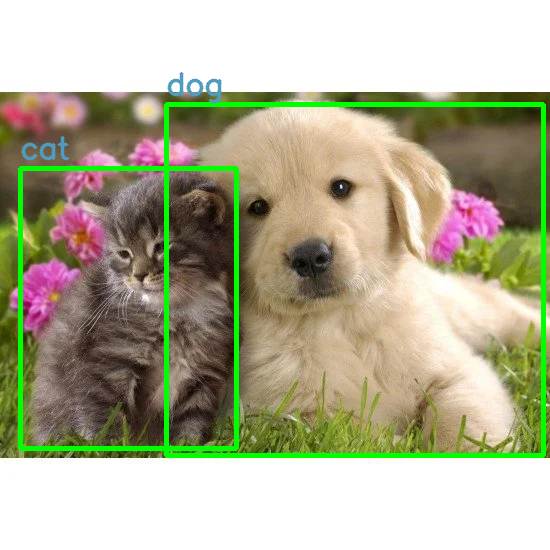

In [33]:
ig = cv2.imread("/dog kitteb .jpeg")
for i in range(final.shape[0]):
  conf = final[i , 2]
  if conf > 0.3:
    class_name = classNames[final[i , 1]]
    x1 , y1 , x2 , y2 = final[i , 3:]
    x1 = x1 * width
    y1 *= height
    x2 *= width
    y2 *= height
    top_left = (int(x1) , int(y1))
    bottom_right = (int(x2) , int(y2))
    ig = cv2.rectangle(ig , top_left , bottom_right , (0 , 255 , 0) , 3)
    ig = cv2.putText(ig , class_name , (int(x1) , int(y1) - 10) , font ,
                     1 , (190 ,155 , 80) , 2 , cv2.LINE_AA)
cv2_imshow(ig)